# Final Project - Course Métodos para Análise de grande volume de dados e Astroinformática - CBPF

### Student: Luigi Lucas de C. Silva – luigi.lcsilva@gmail.com
### Teacher: Clécio Roque De Bom – debom@cbpf.br

# Goal

The goal of the project presented here is to show some ideas on how to classify variable brightness astronomical objects from their light curves. The main idea was to use a Machine Learning model, the Random Forest model, to this attempt of classification. The data used here was obtained in the platform of the challenge PLAsTiCC (https://www.kaggle.com/c/PLAsTiCC-2018).


# Data Manipulation

First, let's import some useful packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os
from scipy.fft import rfft,rfftfreq
from scipy import interpolate

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier

Now, let's load the data. There are two files related to the data, one containing some information about each object being classified - the training_set_metadata file - and other containing, for each object, many measures of brightness along time, in each passband - the training_set file.

Loading the metadata:

In [2]:
training_metadata_path = 'input/training_set_metadata.csv'

training_metadata_data = pd.read_csv(training_metadata_path)

training_metadata_data.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


Loading the data:

In [3]:
training_path = 'input/training_set.csv'

training_data = pd.read_csv(training_path)

training_data.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


Let's make some plots to visualize the data. First, let's make a plot for object 615, passband 0.

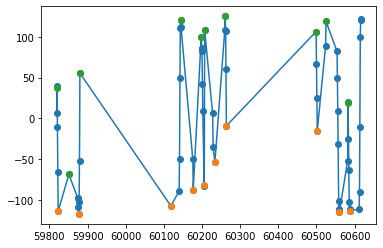

In [4]:
#################################################################################################
### SOME EXAMPLES OF PLOT FOR OBJECT 615
# Plot of object 615 passband 0
obj615pass0 = training_data.loc[(training_data['object_id'] == 615) & (training_data['passband'] == 0)]
plt.scatter(obj615pass0['mjd'], obj615pass0['flux'])

# Plot of object 615 passband 1
#obj615pass1 = training_data.loc[(training_data['object_id'] == 615) & (training_data['passband'] == 1)]
#plt.scatter(obj615pass1['mjd'], obj615pass1['flux'])

# Plot of object 615 passband 2
#obj615pass2 = training_data.loc[(training_data['object_id'] == 615) & (training_data['passband'] == 2)]
#plt.scatter(obj615pass2['mjd'], obj615pass2['flux'])

# Plot of object 615 passband 3
#obj615pass3 = training_data.loc[(training_data['object_id'] == 615) & (training_data['passband'] == 3)]
#plt.scatter(obj615pass3['mjd'], obj615pass3['flux'])

#################################################################################################
### INTERPOLATION FOR OBJECT 615 PASSBAND 0
#Data to be interpolated.
x = obj615pass0['mjd']
y = obj615pass0['flux']

#Different methods of interpolation.
flinear = interpolate.interp1d(x, y)
#fcubic = interpolate.interp1d(x, y, kind='cubic')
#ftest = interpolate.InterpolatedUnivariateSpline(x, y)

#Defining the time steps and time axis to resample the data.
data_step = 0.1
xnew = np.arange(x.min(), x.max(), data_step)

#Obtaining the interpolation to the chosen time axis.
ylinear = flinear(xnew)
#ycubic = fcubic(xnew)
#ytest = ftest(xnew)

#Ploting the data and the graph of interpolation.
#plt.plot(x, y, xnew, ylinear)
#plt.show()

#################################################################################################
### FOURIER TRANSFORM FOR OBJECT 615 PASSBAND 0
#Defining the time axis and the signal.
#t = xnew
#f_noise = ylinear

#Calculating the Fourier transform.
#n    = len(t)
#yf   = rfft(f_noise)
#xf   = rfftfreq(n,data_step)
#plt.plot(xf,np.abs(yf))

#################################################################################################
### FINDING PEAKS AND VALLEYS
#Defining a Data Frame with the results of interpolation.
df615 = pd.DataFrame()
df615['time'] = xnew
df615['data'] = ylinear

#Setting the condition to obtain peaks and valleys and saving them into new columns.
df615['min'] = df615.data[(df615.data.shift(1) > df615.data) & (df615.data.shift(-1) > df615.data)]
df615['max'] = df615.data[(df615.data.shift(1) < df615.data) & (df615.data.shift(-1) < df615.data)]
#print(df615)
#print(df615['min'].count()) #Here, the function count() counts all the non-NaN values.
#print(df615['max'].count())

#Plotting the interpolation data, the maximums and minimums.
plt.plot(xnew, ylinear, xnew, df615['min'],'o', xnew, df615['max'], 'o')
plt.show()

Now, let's make a plot for object 130779836.

1


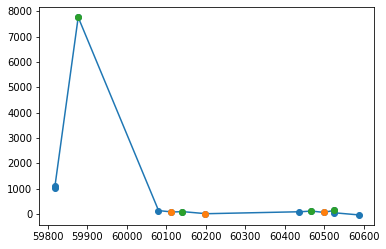

In [5]:
#################################################################################################
### SOME EXAMPLES OF PLOT FOR OBJECT 130779836
# Plot of object 130779836 passband 0
obj130779836pass0 = training_data.loc[(training_data['object_id'] == 130779836) & (training_data['passband'] == 0)]
plt.scatter(obj130779836pass0['mjd'], obj130779836pass0['flux'])

# Plot of object 130779836 passband 1
#obj130779836pass1 = training_data.loc[(training_data['object_id'] == 130779836) & (training_data['passband'] == 1)]
#plt.scatter(obj130779836pass1['mjd'], obj130779836pass1['flux'])

# Plot of object 130779836 passband 2
#obj130779836pass2 = training_data.loc[(training_data['object_id'] == 130779836) & (training_data['passband'] == 2)]
#plt.scatter(obj130779836pass2['mjd'], obj130779836pass2['flux'])

# Plot of object 130779836 passband 3
#obj130779836pass3 = training_data.loc[(training_data['object_id'] == 130779836) & (training_data['passband'] == 3)]
#plt.scatter(obj130779836pass3['mjd'], obj130779836pass3['flux'])

#################################################################################################
### INTERPOLATION FOR OBJECT 130779836 PASSBAND 0
#Data to be interpolated.
x = obj130779836pass0['mjd']
y = obj130779836pass0['flux']

#Different methods of interpolation.
flinear = interpolate.interp1d(x, y)
#fcubic = interpolate.interp1d(x, y, kind='cubic')
#ftest = interpolate.InterpolatedUnivariateSpline(x, y)

#Defining the time steps and time axis to resample the data.
data_step = 0.1
xnew = np.arange(x.min(), x.max(), data_step)

#Obtaining the interpolation to the chosen time axis.
ylinear = flinear(xnew)
#ycubic = fcubic(xnew)
#ytest = ftest(xnew)

#Ploting the data and the graph of interpolation.
#plt.plot(x, y, xnew, ylinear)
#plt.show()

#################################################################################################
### FOURIER TRANSFORM FOR OBJECT 615 PASSBAND 0
#Defining the time axis and the signal.
#t = xnew
#f_noise = ylinear

#Calculating the Fourier transform.
#n    = len(t)
#yf   = rfft(f_noise)
#xf   = rfftfreq(n,data_step)
#plt.plot(xf,np.abs(yf))

#################################################################################################
### FINDING PEAKS AND VALLEYS
#Defining a Data Frame with the results of interpolation.
df130779836 = pd.DataFrame()
df130779836['time'] = xnew
df130779836['data'] = ylinear

#Setting the condition to obtain peaks and valleys and saving them into new columns.
df130779836['min'] = df130779836.data[(df130779836.data.shift(1) > df130779836.data) & (df130779836.data.shift(-1) > df130779836.data)]
df130779836['max'] = df130779836.data[(df130779836.data.shift(1) < df130779836.data) & (df130779836.data.shift(-1) < df130779836.data)]
#print(df130779836)
#print(df130779836['min'].count()) #Here, the function count() counts all the non-NaN values.
#print(df130779836['max'].count())

#Trying to filter the peaks and valleys to get only the significant ones. I have to improve the diff_cut condition.
#I may use diff_cut > mean flux (or some fraction of mean flux). It might work (I hope).
max_notnull = df130779836[df130779836['max'].notnull()]
min_notnull = df130779836[df130779836['min'].notnull()]
max_notnull_reset = max_notnull.reset_index()
min_notnull_reset = min_notnull.reset_index()

min_max_df = pd.DataFrame()
min_max_df['max'] = max_notnull_reset['max']
min_max_df['min'] = min_notnull_reset['min']
#print(min_max_df)

diff_cut = df130779836['data'].mean()/2
diff_min_max = (min_max_df['max'] - min_max_df['min']).abs()
print(diff_min_max[diff_min_max > diff_cut].count())
#print(diff_cut)

#Plotting the interpolation data, the maximums and minimums.
plt.plot(xnew, ylinear, xnew, df130779836['min'],'o', xnew, df130779836['max'], 'o')
plt.show()

## Extracting Statistical Information from Data

The idea now is to extract some statistical information from data to use it as feature in the Random Forest model. 

First, I will do a loop. In each execution of the loop, I will get one of the passbands (i = 0, 1, 2, 3, 4 or 5), and save in a new dataframe, then I will save this dataframe in a dictionary. Next, still in this execution of the loop, I will group the dataframe containing just one passband by object_id. 

Now that I have a dataframe with just one passband and grouped by object_id, I can extract statistical information for each object in that specific band. In the others executions of the loop, I will do the same for the others passbands. I will store these informations in a dataframe named pass_statistical.

Finally, I will include the "target" column, which can be found in the metadata file, in this pass_statistical dataframe. What I have now? I have a dataframe with a lot of statistical informations for each band of each object, which I will use as features, and the target, that is, the classes I want my model to assign for each object.

In [6]:
#Here, we just have the index names that will be used.
BANDS = ["0","1","2", "3", "4", "5"]
PASSBANDMAGS = ['passband_'+band for band in BANDS]

#Creating variables to store the dictionary (it will contain the dataframes sorted by passbands) 
#and the statistical informations.
d_pass = {}
pass_statistical = pd.DataFrame()

i=0

#Here is the loop for creating the dictionaries and saving the statistical informations.
for passbands in PASSBANDMAGS:
    #In this part, I sort the entries by their passbands and save in the dictionary.
    d_pass[passbands] = pd.DataFrame()
    d_pass[passbands] = training_data[(training_data['passband'] == i)]
    
    d_pass_group = d_pass[passbands].groupby('object_id') #Updating the group.
    
    #Calculating the flux statistics for each band, and saving them in the pass_statistical dataframe.
    pass_statistical[passbands+'_sum'] = d_pass_group['flux'].sum()
    pass_statistical[passbands+'_median'] = d_pass_group['flux'].median()
    pass_statistical[passbands+'_variance'] = d_pass_group['flux'].var(ddof=0)
    pass_statistical[passbands+'_mean'] = d_pass_group['flux'].mean()
    pass_statistical[passbands+'_max'] = d_pass_group['flux'].max()
    pass_statistical[passbands+'_min'] = d_pass_group['flux'].min()
    pass_statistical[passbands+'_std'] = d_pass_group['flux'].std(ddof=0)
    
    #Calulating the slope between consecutive points and putting them into a new column.
    fluxdiff = d_pass_group['flux'].diff()
    timediff = d_pass_group['mjd'].diff()       
    slope = fluxdiff/timediff
    
    d_pass[passbands] = d_pass[passbands].assign(slope = slope)
    
    d_pass_group = d_pass[passbands].groupby('object_id') #Updating the group.
    
    #Calculating the slope statistics for each object.
    pass_statistical[passbands+'_slopesum'] = d_pass_group['slope'].sum()     
    pass_statistical[passbands+'_slopemedian'] = d_pass_group['slope'].median()
    pass_statistical[passbands+'_slopevariance'] = d_pass_group['slope'].var(ddof=0)
    pass_statistical[passbands+'_slopemean'] = d_pass_group['slope'].mean()  
    pass_statistical[passbands+'_slopemax'] = d_pass_group['slope'].max()
    pass_statistical[passbands+'_slopemin'] = d_pass_group['slope'].min()
    pass_statistical[passbands+'_slopestd'] = d_pass_group['slope'].std(ddof=0)
    
    
    ### FINDING PEAKS AND VALLEYS
    #Setting the condition to obtain peaks and valleys and saving them into new columns.
    valleys = d_pass_group.flux.shift(0)[(d_pass_group.flux.shift(1) > d_pass_group.flux.shift(0)) & (d_pass_group.flux.shift(-1) > d_pass_group.flux.shift(0))]
    peaks = d_pass_group.flux.shift(0)[(d_pass_group.flux.shift(1) < d_pass_group.flux.shift(0)) & (d_pass_group.flux.shift(-1) < d_pass_group.flux.shift(0))]
    
    d_pass[passbands] = d_pass[passbands].assign(valleys = valleys)
    d_pass[passbands] = d_pass[passbands].assign(peaks = peaks)
    
    #Defining a column containing the mean flux value for a object, repeatedly in each object row.
    d_pass[passbands]['means'] = d_pass[passbands].flux.groupby(d_pass[passbands].object_id).transform('mean')
    
    #Filtering the peaks that are above the mean flux value of each object.
    d_pass[passbands].loc[(d_pass[passbands].peaks < d_pass[passbands].means),'peaks'] = np.NaN
    
    d_pass_group = d_pass[passbands].groupby('object_id') #Updating the group.
    
    #Counting the "filtered" peaks.
    pass_statistical[passbands+'_peakscount'] = d_pass_group.peaks.count() 
                              
    i+=1  

# Creating a new column in pass_statistical with the targets values.
training_metadata_id = training_metadata_data.set_index('object_id') 
pass_statistical['target'] = training_metadata_id['target']

In [7]:
pass_statistical.head()

,passband_0_sum,passband_0_median,passband_0_variance,passband_0_mean,passband_0_max,passband_0_min,passband_0_std,passband_0_slopesum,passband_0_slopemedian,passband_0_slopevariance,...,passband_5_std,passband_5_slopesum,passband_5_slopemedian,passband_5_slopevariance,passband_5_slopemean,passband_5_slopemax,passband_5_slopemin,passband_5_slopestd,passband_5_peakscount,target
object_id,,,,,,,,,,,,,,,,,,,,,
615,-205.036926,-10.015225,6934.865833,-3.254554,125.182808,-116.913223,83.275842,9.100766,-3.823235,2139.817712,...,292.182295,71.951263,-3.138836,6648.838513,1.284844,226.111645,-165.567245,81.540410,14,92
713,-190.427851,-3.096805,49.879128,-2.720398,14.509829,-14.735178,7.062516,11.038988,0.052090,10.991812,...,7.030448,-4.869480,0.025684,3.093053,-0.088536,6.128550,-4.635020,1.758708,9,88
730,-3.461790,0.024093,3.298318,-0.048080,5.942166,-3.459960,1.816127,6.025461,-0.005435,6.418139,...,13.201397,4.017138,0.007533,3.833073,0.080343,5.935501,-4.491121,1.957824,11,42
745,129.421659,1.056714,18.869993,1.797523,18.014029,-3.874349,4.343961,10.968937,0.012451,10.080813,...,25.822133,-8.251377,0.127741,4.252637,-0.152803,3.994978,-5.749368,2.062192,7,90
1124,41.639721,0.581027,5.481586,0.660948,5.330927,-6.804703,2.341279,-20.183787,-0.032629,6.747148,...,21.245772,-11.328929,-0.001069,6.320671,-0.202302,5.308361,-6.676510,2.514094,8,90


# Implementation of Random Forest

Now, let us implement the Random Forest algorithm. First of all, I will define the Prediction Target (y) and the "Features" (X). After that, I will split the data, one part for training the model, and the other to validate the model.

In [8]:
y = pass_statistical.target

X = pass_statistical[pass_statistical.columns[:-1]]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Before implementing Random Forest, let us fit a single Decision Tree first, for comparison.

In [9]:
#Defining the model. Here, the random_state=1 is just for our model, given an input, provide the same results always.
tree_model = DecisionTreeClassifier(random_state=1) 

#Fitting the model wiht the train set.
tree_model.fit(train_X, train_y)

#Making predictions from the validation set.
tree_val_predictions = tree_model.predict(val_X)

#Measuring accuracy.
accuracy = accuracy_score(val_y, tree_val_predictions)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.5178389398572885


Now, let us use a Random Forest.

In [10]:
#Defining the model. Again, the random_state=1 is just for our model, given an input, provide the same results always.
forest_model = RandomForestClassifier(random_state=1)

#Fitting the model wiht the train set.
forest_model.fit(train_X, train_y)

#Making predictions from the validation set.
forest_val_predictions = forest_model.predict(val_X)

#Measuring accuracy.
accuracy = accuracy_score(val_y, forest_val_predictions)

print('RandomForestClassifier accuracy score: {}'.format(accuracy))

RandomForestClassifier accuracy score: 0.6722731906218145


Now, let us try to get the importance of each feature and filter the features.

In [11]:
#Get the importance of the resulting features.
importances = forest_model.feature_importances_

#Create a dataframe for visualization.
final_df = pd.DataFrame({"Features": pd.DataFrame(train_X).columns, "Importances":importances})
final_df.set_index('Importances')

#Sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

#Show the features importances.
final_df[-5:]

,Features,Importances
31,passband_2_median,0.019807
39,passband_2_slopevariance,0.020080
50,passband_3_min,0.023149
20,passband_1_min,0.024261
35,passband_2_min,0.032333
